In [18]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (10,6)

# Problem 1

## A)

In [4]:
# Normal distribution with a mean of 0 and a sigma of 3
background = stats.norm.rvs(0, 3, size = 1000000)
# Random uniform signal distribution
signal = np.random.uniform(0, 20, size=1000000)

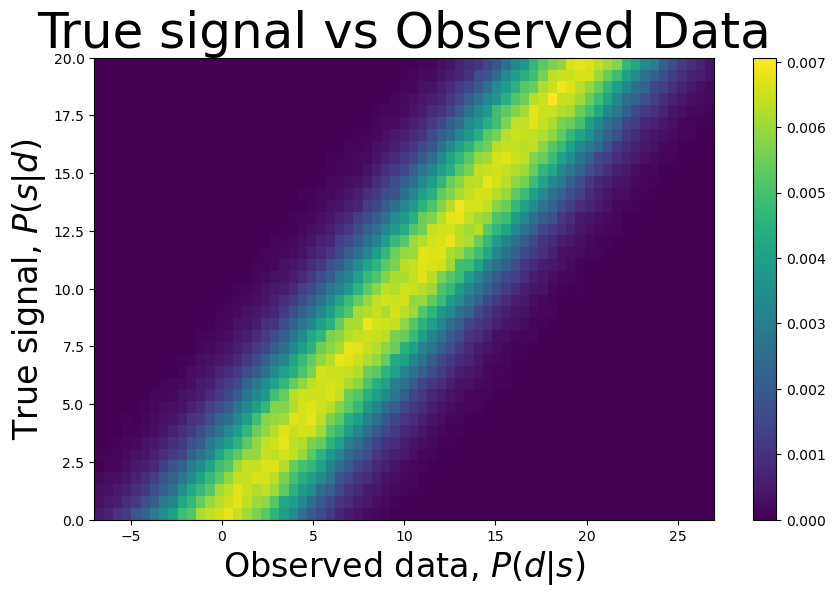

In [33]:
# Combining data
data = background + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

# Setting up plot
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

# Setting up colors
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading = 'auto')

# Labels, legend, and axes
plt.title("True signal vs Observed Data", fontsize = 36)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.colorbar()

plt.show()

The above histogram shows the distribution of a normal distribution with $\sigma=3$, and a mean of 0. Added over top is a uniformly distributed random signal. From this plot, we can see the possible true signals for a given observational value and vice versa. This shows that knowing one doesn't necessarily mean we know both. For example, if we have an observational value from an experiment, then we can use this to create the corrosponding probability distribution for the possible values of the true signal. We see thi displayed as a range of values instead of a constant since the background is not just a constant, but rather a range itelf.

## B)

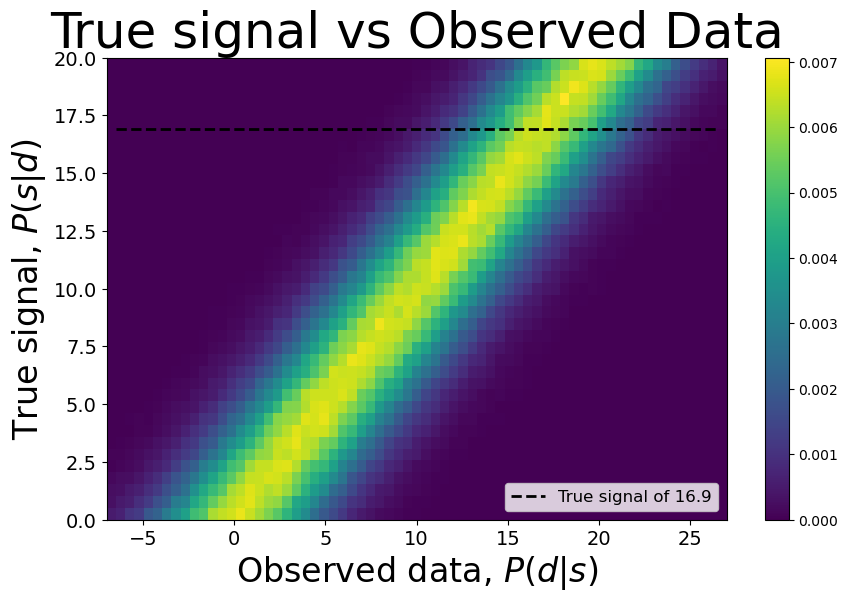

In [34]:
# Using a true signal of 16.9
true_signal = [16.9]*(len(dataedges)-2)

# Plotting dashed line
fig, ax = plt.subplots()
plt.tick_params(labelsize = 14)
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading = 'auto')
plt.plot(dataedges[1:-1], true_signal ,linestyle='--',linewidth= 2 ,color='black',label='True signal of 16.9')

# Labels, legend, and axes
plt.title("True signal vs Observed Data", fontsize = 36)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax.legend(loc='lower right', fontsize=12)
plt.colorbar()

plt.show()

In [ ]:
observed_values = []
for i in range(len(data)):
    if signal[i] >= 16.9 and signal[i] <=16.99:
        obsvals.append(data[i])

In [ ]:
# plot the range of possible observed data values for this true signal
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8),gridspec_kw={'wspace': 0.4})
plt.style.use('ggplot')

ax1.set_title("Range of Observed Data Values, True Signal=12.5",fontsize=20)
ax2.set_title("Log Range of Observed Data Values, True Signal=12.5",fontsize=20)
ax1.set_xlabel('Observed signal',fontsize=20), ax2.set_xlabel('Observed signal',fontsize=20)
ax1.set_ylabel('$P(d|s=12.5)$',fontsize=20), ax2.set_ylabel('Log[$P(d|s=12.5)$]',fontsize=20)
ax1.tick_params(labelsize = 14), ax2.tick_params(labelsize = 14)

ax1.hist(obsvals,histtype='step',color='r',density=True,linewidth=3.5,bins=50)
ax2.hist(obsvals,histtype='step',color='r',density=True,linewidth=3.5,bins=50)
ax2.set_yscale('log')

plt.show()

## C)